In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

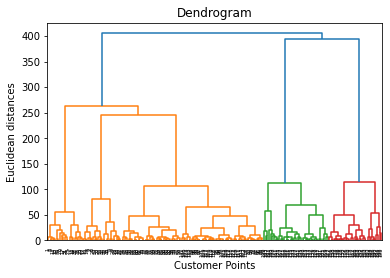

In [3]:
#use dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
#'ward' refers to minimum variance (target: the points in the cluster do not vary too much)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer Points')
plt.ylabel('Euclidean distances')
plt.show()

In [4]:
#we get the optimal number of clusters by finding the largest
#vertical distance that is not interrupted by a horizontal bar
#we decided to take 5 clusters
#train hierarchical clustering model on dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [5]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


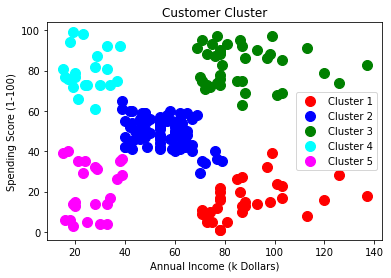

In [6]:
#y_hc == 0: we only select customers where the index is 0
#the 0 after the comma means: we select the annual income
#the 1 after the comma means: we select the spending score
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#show the centroids
plt.title('Customer Cluster')
plt.xlabel('Annual Income (k Dollars)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [7]:
#try 3 clusters
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

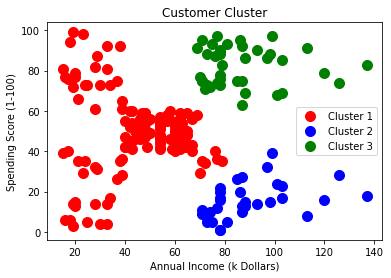

In [8]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#show the centroids
plt.title('Customer Cluster')
plt.xlabel('Annual Income (k Dollars)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [9]:
#take in all features
#do one-hote encoding on gender column
X = pd.get_dummies(dataset)

In [11]:
X.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0


In [31]:
X_all = X.iloc[:, 1:].values

In [34]:
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_all)

In [35]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [43]:
#getting the avergae values of these clusters
#average age of all customers
X_all[:, 0].mean()

38.85

In [44]:
#getting average age of customers, who belong to cluster 0
X_all[:, 0][y_hc == 0].mean()

42.1566265060241

In [46]:
#getting average age of customers, who belong to cluster 1
X_all[:, 0][y_hc == 1].mean()

41.68571428571428

In [63]:
i = 0
age = []
income = []
spending = []
female = []
male =[]
while i < 5:
    age.append(X_all[:, 0][y_hc == i].mean())
    income.append(X_all[:, 1][y_hc == i].mean())
    spending.append(X_all[:, 2][y_hc == i].mean())
    female.append(X_all[:, 3][y_hc == i].mean())
    male.append(X_all[:, 4][y_hc == i].mean())
    i = i + 1
data_tuples = list(zip(age, income, spending, female, male))
data_tuples
pd.DataFrame(data_tuples, columns = ['Age', 'Income', 'Spending Score', 'Ratio Females', 'Ratio Males'])
    

,Age,Income,Spending Score,Ratio Females,Ratio Males
0,42.156627,54.759036,49.771084,0.602410,0.397590
1,41.685714,88.228571,17.285714,0.428571,0.571429
2,32.692308,86.538462,82.128205,0.538462,0.461538
3,24.850000,24.950000,81.000000,0.600000,0.400000
4,45.217391,26.304348,20.913043,0.608696,0.391304
